Introducción a la Teoría de Control
=====
Con Matlab
========

##### Version 0.1

`Contenido Original creado por Ezequiel Leonardo Castaño`

<font color='Firebrick'>Este contenido está en <b>borrador</b> y puede estar incompleto y/o sufrir modificaciones</font>
___

Enlaces Útiles:

- Los demás capítulos pueden encontrarse en el [homepage](https://elc.github.io/control). 
- El repositorio completo está disponible en Github como [Control Theory With Matlab](https://github.com/ELC/control-theory-with-matlab)
- Ante dudas y sugerencias, no dudes en utilizar los [Github Issues](https://github.com/ELC/control-theory-with-matlab/issues)

En los siguientes capítulos los tres enlaces se mostrarán con estos botones

<nav style="display: flex;justify-content: space-evenly;">
    <a href="https://elc.github.io/control"><img src="https://img.shields.io/badge/Book-Chapters-blue?style=for-the-badge&amp;logo=GitBook&amp;logoColor=white"></a>
    <a href="https://github.com/ELC/control-theory-with-matlab"><img src="https://img.shields.io/badge/Github-Repo-green?style=for-the-badge&amp;logo=github&amp;logoColor=white"></a>
    <a href="https://github.com/ELC/control-theory-with-matlab/issues"><img src="https://img.shields.io/badge/Github%20Issues-Questions-orange?style=for-the-badge"></a>
</nav>

In [ ]:
%plot inline --format=png -w 1600

In [2]:
format compact;

## Transformada de Laplace

### Definición

La transformada de Laplace es una **generalización** de la transformada de Fourier

La transformada de Fourier convierte una función del **dominio del tiempo** al **dominio de la frecuencia**

$$X(\omega )=\int_{-\infty }^{\infty } x(t)e^{-j\omega t} dt$$

El término $e^{-j\omega t}$ es la forma exponencial de una función senoidal, donde $j$ representa a la unidad imaginaria. Sin embargo, esta transformación resulta bastante restrictiva ya que no hay componentes exponenciales puras.

Para añadir un componente exponencial, se agrega un factor exponencial a la función $x(t)$quedando:

$$X(\sigma ,\omega )=\int_{-\infty }^{\infty } [x(t)\cdot e^{-\sigma t} ]e^{-j\omega t} dt$$

### Desarrollo

Al trabajar algebraicamente se tiene

$$X(\sigma ,\omega )=\int_{-\infty }^{\infty } x(t)\cdot [e^{-\sigma t} \cdot e^{-j\omega t} ]dt$$

$$X(\sigma ,\omega )=\int_{-\infty }^{\infty } x(t)\cdot e^{-\sigma t-j\omega t} dt$$

$$X(\sigma ,\omega )=\int_{-\infty }^{\infty } x(t)\cdot e^{-(\sigma -j\omega )t} dt$$

Y luego se reemplaza a la expresión $\sigma -j\omega$ por una nueva variable compleja llamada $s$, donde $\sigma$ es la parte real y $\omega$ la parte imaginaria, este nuevo dominio diferente del tiempo se conoce como **plano** $s$.

$$X(s)=\int_{-\infty }^{\infty } x(t)e^{-st} dt$$

Esta forma de expresar a la función $x(t)$ como $X(s)$es lo que se conoce como transformada de Laplace, símbolicamente se representa

$$\mathcal{L}\lbrace x(t)\rbrace =X(s)$$

Análogamente para la transformación inversa

$${\mathcal{L}}^{-1} \lbrace X(s)\rbrace =x(t)$$ 

## Propiedades

Algunas de las propiedades de la transformada de Laplace son

### Linearidad

$$\mathcal{L}\lbrace a\cdot f(t)+b\cdot g(t)\rbrace =a\cdot F(s)+b\cdot G(s)$$

### Retraso o Delay

Dada una función escalón definida por $\gamma (t-a)=\left\lbrace \begin{array}{lcc}
0 & si & x\le a\\
1 & si & x\ge a
\end{array}\right.$

$$\mathcal{L}\lbrace f(t-a)\cdot \gamma (t-a)\rbrace =e^{-as} \cdot F(s)$$

### Derivada

$$\mathcal{L}\lbrace f^{^{\prime } } (t)\rbrace =s\cdot F(s)-f(0)$$

$$\mathcal{L}\lbrace f^{^{\prime \prime } } (t)\rbrace =s^2 \cdot F(s)-s\cdot f(0)-f^{^{\prime } } (0)$$

### Integral

$$\mathcal{L}\lbrace \int_0^t f(t)dt\rbrace =\frac{1}{s}\mathcal{L}\lbrace f(t)\rbrace$$

### Teorema del valor inicial

$$\lim_{s\to \infty } (s\cdot F(s))=\lim_{t\to 0} f(t)$$

### Teorema del valor final}

$$\lim_{s\to 0} (s\cdot F(s))=\lim_{t\to \infty } f(t)$$

### Convolución

$$\mathcal{L}\lbrace f(t)*g(t)\rbrace =F(s)\cdot G(s)$$

La operación convolución puede verse gráficamente en esta animación ([Fuente](https://en.wikipedia.org/wiki/Convolution))

<center>
<img src="images/convolution.png">
</center>

## Transformaciones comunes

Normalemente en lugar de hacer la integral, que puede llevar mucho tiempo, se recurre a tablas que tienen las transformadas pre-calculadas. Algunas de las transformadas más comunes son:

### Función impulso 

$$\mathcal{L}\lbrace \delta (c)\rbrace =c$$ 

### Función escalón

$$\mathcal{L}\lbrace c\rbrace =\frac{c}{s}$$ 

### Función rampa

$$\mathcal{L}\lbrace c\cdot t\rbrace =\frac{c}{s^2 }$$ 

### Función exponencial

$$\mathcal{L}\lbrace e^{a\cdot t} \rbrace =\frac{1}{s-a}$$ 


## Laplace en Matlab

Definimos los símbolos a utilizar

In [3]:
a = sym("a");
t = sym("t", 'positive');
s = sym("s");

A continuación se muestran algunos ejemplos con sus transformadas y antitransformadas

### Escalón

In [4]:
funcion = a;
transformada = laplace(funcion, t, s)

transformada =
a/s



In [5]:
funcion = a;
transformada = laplace(funcion, t, s)

transformada =
a/s



In [6]:
transformada_inversa = ilaplace(transformada)

transformada_inversa =
a



#### Ejemplo Gráfico

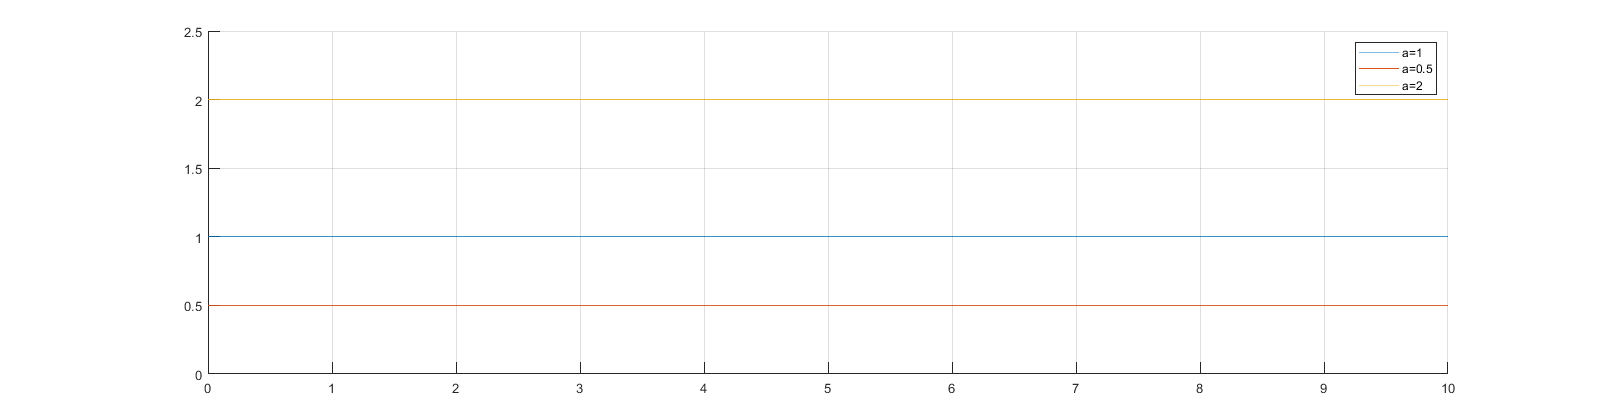

In [7]:
syms f(t) g(t) h(t);
f(t) = 1;
g(t) = 0.5;
h(t) = 2;

figure;
hold on;
fplot([f, g, h], [0 10])
ylim([0 2.5])
grid on
legend("a=1", "a=0.5", "a=2")

### Rampa

In [8]:
funcion = a * t;
transformada = laplace(funcion, t, s)

transformada =
a/s^2



In [9]:
transformada_inversa = ilaplace(transformada)

transformada_inversa =
a*t



#### Ejemplo Gráfico

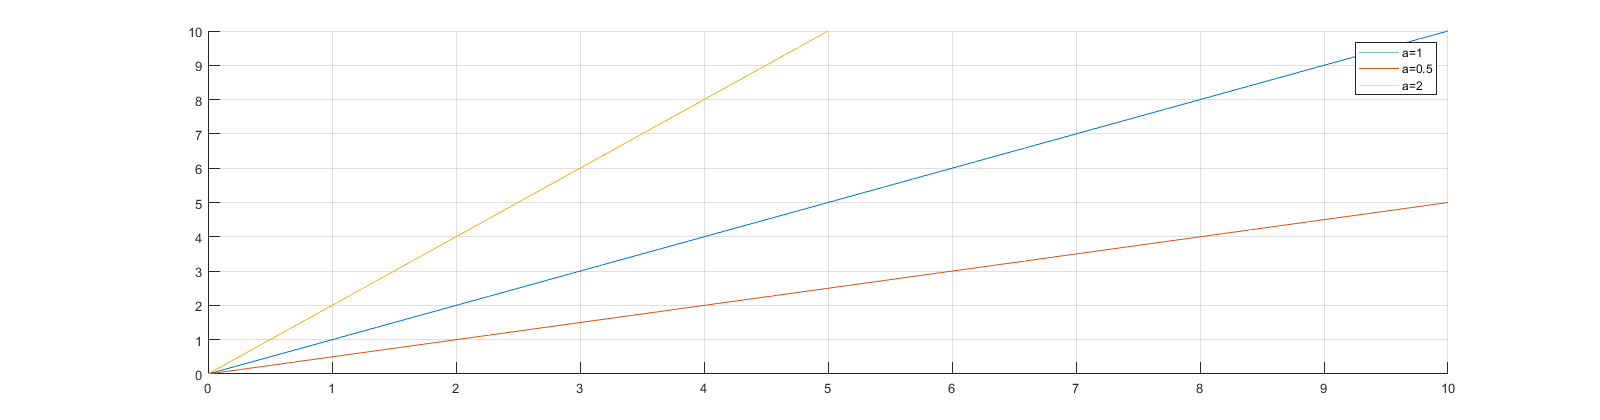

In [10]:
syms f(t) g(t) h(t);
f(t) = 1 * t;
g(t) = 0.5 * t;
h(t) = 2 * t;

figure;
hold on;
fplot([f, g, h], [0 10])
ylim([0 10])
grid on
legend("a=1", "a=0.5", "a=2")

### Exponencial

In [11]:
funcion = exp(-a*t);
transformada = laplace(funcion, t, s)

transformada =
1/(a + s)



In [12]:
transformada_inversa = ilaplace(transformada)

transformada_inversa =
exp(-a*t)



#### Ejemplo Gráfico

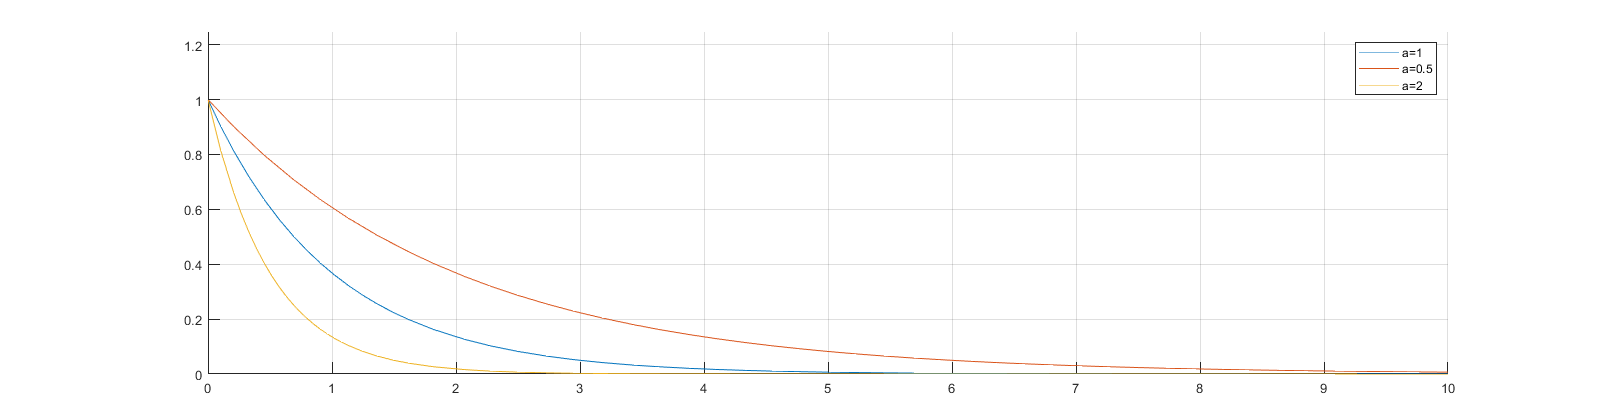

In [13]:
syms f(t) g(t) h(t);
f(t) = exp(-1 * t);
g(t) = exp(-0.5 * t);
h(t) = exp(-2 * t);

figure;
hold on;
fplot([f, g, h], [0 10])
ylim([0 1.25])
grid on
legend("a=1", "a=0.5", "a=2")

### Derivada

In [14]:
syms f(t);
derivada = diff(f, t);
transformada = laplace(derivada, t, s)

transformada =
s*laplace(f(t), t, s) - 1*f(0)



In [15]:
transformada_inversa = ilaplace(transformada)

transformada_inversa =
diff(f(t), t)



In [16]:
integral = int(f, t, 0, t);
transformada = laplace(integral, t, s)

transformada =
laplace(int(f(t), t, 0, t), t, s)



In [17]:
transformada_inversa = ilaplace(transformada)

transformada_inversa =
int(f(t), t, 0, t)



## Ejercicios

In [18]:
s = sym("s");

### Estructura General de un ejercicio

Se define una función cuya antitransformada se desea calcular

In [19]:
funcion_transformada = 12 / ((s-3)*(s+1))

funcion_transformada =
12/((s + 1)*(s - 3))



Se utiliza la función partfrac para separar en fracciones parciales

In [20]:
fracciones_parciales = partfrac(funcion_transformada)

fracciones_parciales =
3/(s - 3) - 3/(s + 1)



Se calcula la antitransformada a las fracciones parciales

In [21]:
ilaplace(fracciones_parciales)

ans =
3*exp(3*t) - 3*exp(-t)



Se verifica haciendo la antitransformada de la función original

In [22]:
ilaplace(funcion_transformada)

ans =
3*exp(3*t) - 3*exp(-t)



### Ejercicios Adicionales

Ejercicio 1

In [23]:
funcion_transformada = (4) / (s^2 - 9)

funcion_transformada =
4/(s^2 - 9)



In [24]:
fracciones_parciales = partfrac(funcion_transformada)

fracciones_parciales =
0.6667/(s - 3) - 0.6667/(s + 3)



In [25]:
ilaplace(fracciones_parciales)

ans =
0.6667*exp(3*t) - 0.6667*exp(-3*t)



Ejercicio 2

In [26]:
funcion_transformada = (s^2+2*s+3) / (s+1)^2

funcion_transformada =
(s^2 + 2*s + 3)/(s + 1)^2



In [27]:
fracciones_parciales = partfrac(funcion_transformada)

fracciones_parciales =
2/(s + 1)^2 + 1



In [28]:
ilaplace(fracciones_parciales)

ans =
2*t*exp(-t)



Ejercicio 3

In [29]:
funcion_transformada = (5*(s+2)) / (s^2*(s+1)*(s+3))

funcion_transformada =
(5*s + 10)/(s^2*(s + 1)*(s + 3))



In [30]:
fracciones_parciales = partfrac(funcion_transformada)

fracciones_parciales =
2.5000/(s + 1) + 0.2778/(s + 3) - 2.7778/s + 3.3333/s^2



In [31]:
ilaplace(fracciones_parciales)

ans =
3.3333*t + 2.5000*exp(-t) + 0.2778*exp(-3*t) - 2.7778

